# Palmer Penguins Identification

## Purpose
The purpose of this project is to classify Palmer Penguins using Machine Learning and improve self-understanding.

## Problem
Researchers spent time collecting data on penguins near the Palmer Station in Antarctica. Given a set of data on a given penguin, 
a model should be able to classify & predict what type of penguin it is.

## Solution

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

### Pre-process data
Let's read the data from the dataset.

In [2]:
df = pd.read_csv('./data/penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Check for duplicates

In [3]:
df[df.duplicated()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


Awesome, no duplicates. Checking now for missing data.

In [4]:
# Count rows missing data
df.isnull().any(axis=1).sum()

11

Eleven rows missing data, let's see what those rows are and what's missing

In [5]:
null_data = df[df.isnull().any(axis=1)]
null_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


Looks like indicies 3 & 271 don't contribute much to the data pool. We'll drop those.

In [6]:
df = df.drop([3, 271])

Let's check the data again to make sure those were removed correctly.

In [7]:
null_data = df[df.isnull().any(axis=1)]
null_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


Okay, those entries have been removed. Now for the penguins missing an identifiable sex. Given that there are only a handful of penguins missing this data, we'll just drop them from the dataset as the overall population of data is still statistically significant.

In [8]:
df = df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


The year column will also be dropped as it is not expected to contribute much in terms of analysis.

In [9]:
df = df.drop(['year'], axis=1)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


### Visualize Data
Now that the data is created, let's visualize it

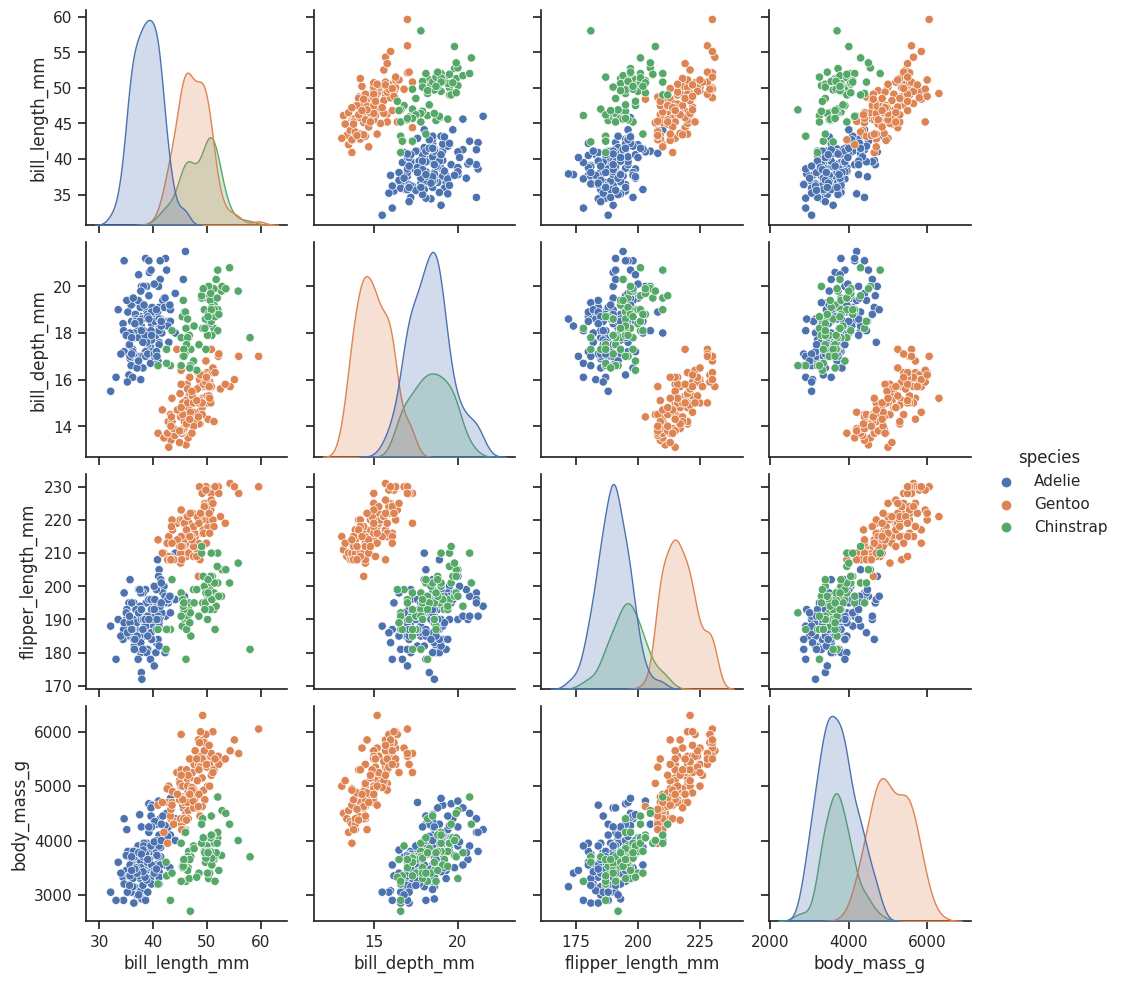

In [10]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="species")

### Observations

* Bill length
    * Adelie penguins have the shortest bills
    * Gentoo & Chinstrap penguins have similarly long bill lengths
* Bill depth
    * Gentoo has the shortest bill depth
    * Adelie & Chinstrap have similar bill depths, but Adelie has a greater range
* Flipper length
    * Adelie has the shortest average flipper length
    * Chinstrap has a slightly better flipper length average than Adelie
    * Gentoo has the longest flipper length and barely intersects the other two penguins
* Body mass
    * Adelie & Chinstrap have essentially the same body mass average
    * Gentoo is the largest penguin

* Adelie penguins are the most variable
* Chinstrap has the lowest population

### Model Training

Let's now break up the data into 80% training and 20% testing for the model.

In [11]:
import sklearn.model_selection
train, test = sklearn.model_selection.train_test_split(df, test_size=0.2, random_state=0)